In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File location
data_loc = "./raw_data/6.14.22 AM_6_9T_M2_2 Run 1 v2.txt"

# Header length
head_N = 38

## Printing header

In [2]:
with open(data_loc, "r") as file:
    for i in range(head_N):
        line = next(file).strip()
        print(line)

# Header:     Marmot Input File
#
# Column 1:  Euler angle "phi1" (in radians)
# Column 2:  Euler angle "PHI" (in radians)
# Column 3:  Euler angle "phi2" (in radians)
# Column 4:  x-coordinate (in microns)
# Column 5:  y-coordinate (in microns)
# Column 6:  z-coordinate (in microns)
# Column 7:  grain number (integer)
# Column 8:  phase number (integer)
# Column 9:  symmetry class (from TSL)
#
# Phase 1: notIndexed (symmetry class = 0)
# Number of grains in Phase 1: 0
#
# Phase 2: Iron bcc (old) (symmetry class = 45)
# Number of grains in Phase 2: 35
#
# Phase 3: Iron fcc (symmetry class = 45)
# Number of grains in Phase 3: 24
#
# X_Min:      0.000000
# X_Max:    214.800000
# X_step:     0.400000
# X_Dim:    5.370000e+02
#
# Y_Min:      0.000000
# Y_Max:    162.399990
# Y_step:     0.399995
# Y_Dim:    4.060051e+02
#
# Z_Min:      0.000000
# Z_Max:      0.000000
# Z_step:     0.000000
# Z_Dim:      0
#
# Note:  This is a 2D dataset with z-coordinates set to zero!
#


## Convert data to pandas dataframe

First, we need to covert the data into a pandas dataframe, which will allow us to easily view and adit data as necessary. We will skip over the header (38 lines), and just convert the data table

In [3]:
df=pd.read_csv(data_loc, sep=" ", skiprows=38, 
               names=["phi1", "Phi", "phi2", "x", "y", "z", "grain", "phase", "symm"])

display(df)

,phi1,Phi,phi2,x,y,z,grain,phase,symm
0,2.83046,2.17202,6.02790,0.0,0.00000,0.0,45,3,45
1,2.81687,2.17106,6.02976,0.0,0.40000,0.0,45,3,45
2,2.82336,2.16656,6.01312,0.0,0.80000,0.0,45,3,45
3,2.83098,2.15868,5.99753,0.0,1.20000,0.0,45,3,45
4,5.93338,1.00893,3.42786,0.0,4.00000,0.0,45,3,45
...,...,...,...,...,...,...,...,...,...
218045,4.24567,0.91424,0.45969,214.8,158.79999,0.0,59,3,45
218046,4.25462,0.91565,0.46629,214.8,159.19999,0.0,59,3,45
218047,6.14556,1.14689,2.38356,214.8,160.79999,0.0,59,3,45
218048,1.04061,2.30066,5.72316,214.8,161.59999,0.0,59,3,45


# Observed errors

1. The values in the y direction have a physically unreasonable number of significant digits. I am assuming that there is a rounding error somewhere. This is confirmed by the value of `X_dim` in the header, which we would expect to be an integer number (we can't have a fractional number of elements). We can fix this by rounding the values of the y data points to one significant digit. 

2. We do not have the correct number of data points. From the header, we are expecting `X_dim+1` x `Y_dim+1` or 218,966 total data points. From the size of the pandas dataframe, we only have 218,050 data points.

3. The values of each Euler angle within each grain vary so significantly, they must be physically meaningless.

## Error 1: Error in y values

Using pandas, rounding the values of each y value to 1 decimal point is trivial

In [4]:
df.y=df.y.round(3)
display(df)

,phi1,Phi,phi2,x,y,z,grain,phase,symm
0,2.83046,2.17202,6.02790,0.0,0.0,0.0,45,3,45
1,2.81687,2.17106,6.02976,0.0,0.4,0.0,45,3,45
2,2.82336,2.16656,6.01312,0.0,0.8,0.0,45,3,45
3,2.83098,2.15868,5.99753,0.0,1.2,0.0,45,3,45
4,5.93338,1.00893,3.42786,0.0,4.0,0.0,45,3,45
...,...,...,...,...,...,...,...,...,...
218045,4.24567,0.91424,0.45969,214.8,158.8,0.0,59,3,45
218046,4.25462,0.91565,0.46629,214.8,159.2,0.0,59,3,45
218047,6.14556,1.14689,2.38356,214.8,160.8,0.0,59,3,45
218048,1.04061,2.30066,5.72316,214.8,161.6,0.0,59,3,45


In [5]:
X_Min = 0.0
X_Max = 214.8
X_step = 0.4
X_Dim = 537

Y_Min = 0.0
Y_Max = 162.4
Y_step = 0.4
Y_Dim = 406

## Error 2: Missing data points

To fix this issue, we first need to understand why we have fewer data points than expected. We can do this simply by plotting the location of each data point on a scatter plot.

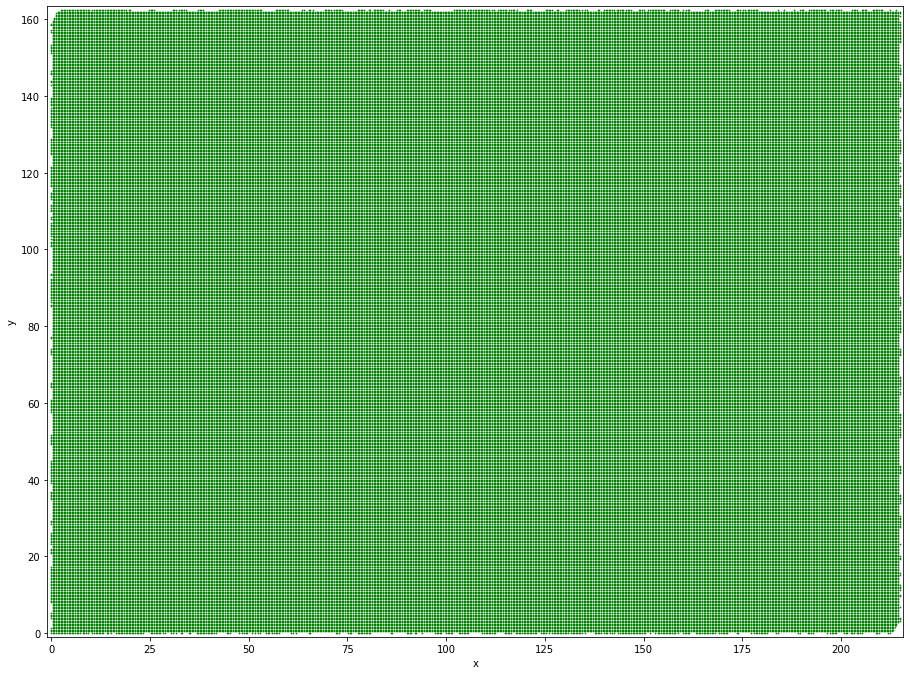

In [6]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df.x, df.y, s=0.5, c="g")

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-1,X_Max+1)
plt.ylim(-1,Y_Max+1)

plt.show()

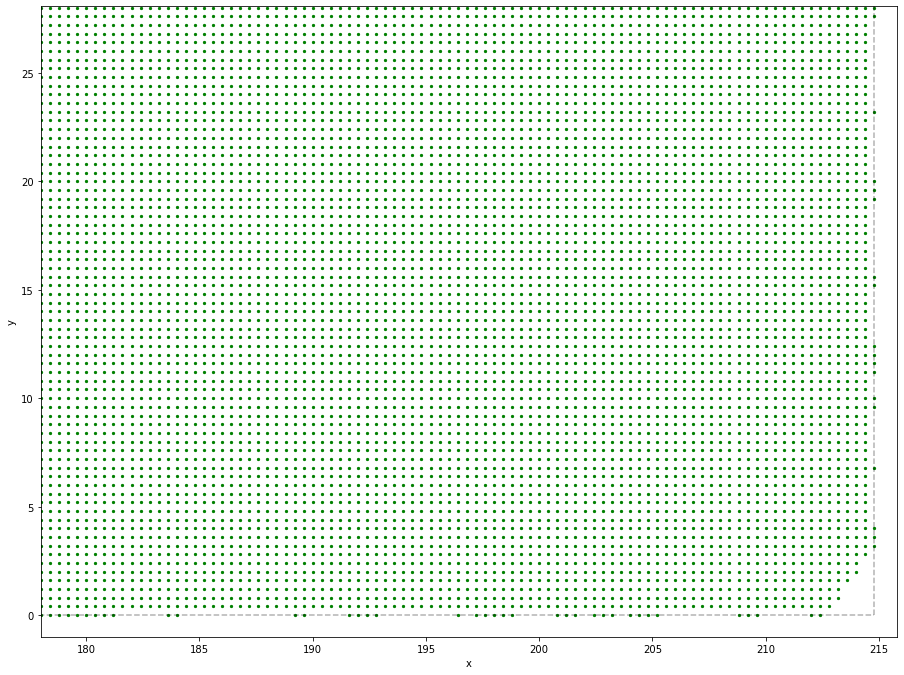

In [7]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df.x, df.y, s=5, c="g")

plt.plot([0, X_Max],[0, 0],'--', color='black', alpha=0.3)
plt.plot([X_Max, X_Max],[0, Y_Max],'--', color='black', alpha=0.3)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(((X_Max/6)*5)-1,X_Max+1)
plt.ylim(-1,((Y_Max/6))+1)

plt.show()

From the plot, we can see that the SEM scan is missing data points around the edges. We can fix this by dropping the data around the edges. Visually, it seems dropping 5 data points around each edge of the image will be sufficient. 

In [8]:
dN = 5

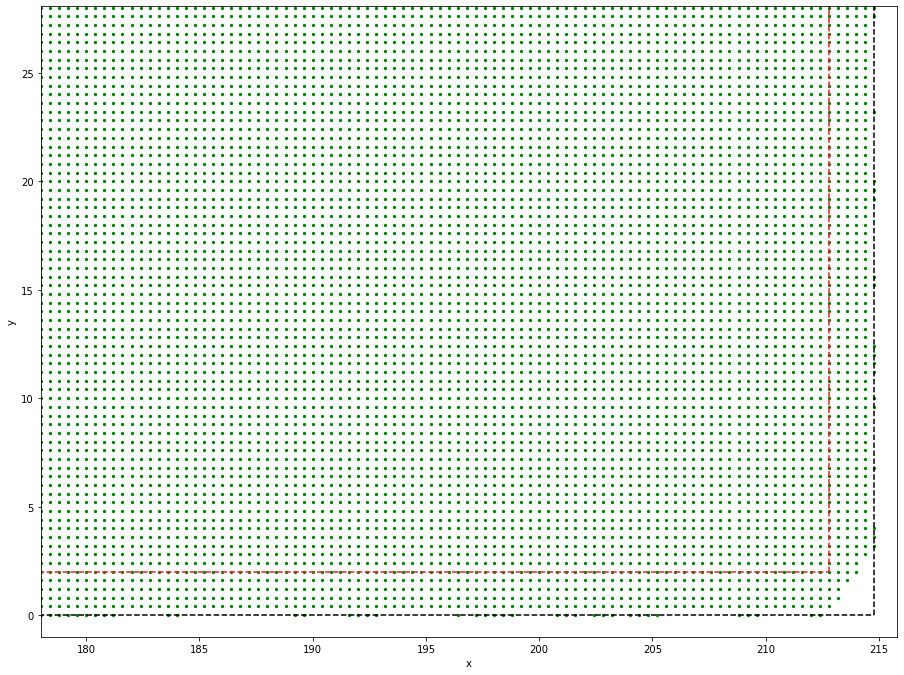

In [9]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df.x, df.y, s=5, c="g")

# Old Border
plt.plot([X_Min, X_Max],[Y_Max, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Min, X_Max],[Y_Min, Y_Min],'--', color='black', alpha=1)
plt.plot([X_Min, X_Min],[Y_Min, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Max, X_Max],[Y_Min, Y_Max],'--', color='black', alpha=1)

# New Border
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Max-(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Min+(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Min+(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Max-(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(((X_Max/6)*5)-1,X_Max+1)
plt.ylim(-1,((Y_Max/6))+1)

plt.show()

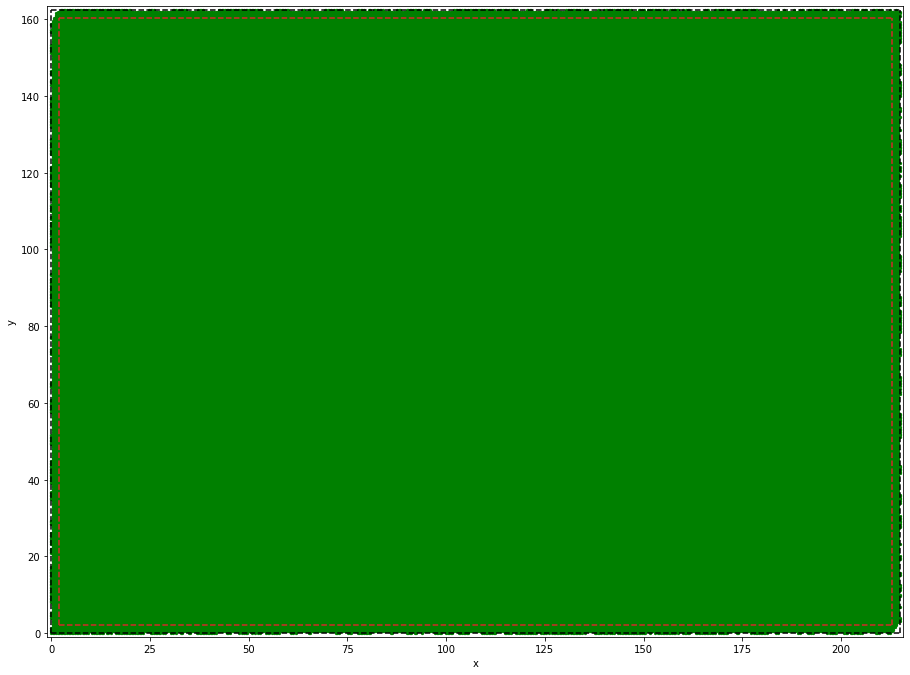

In [10]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df.x, df.y, s=5, c="g")

# Old Border
plt.plot([X_Min, X_Max],[Y_Max, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Min, X_Max],[Y_Min, Y_Min],'--', color='black', alpha=1)
plt.plot([X_Min, X_Min],[Y_Min, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Max, X_Max],[Y_Min, Y_Max],'--', color='black', alpha=1)

# New Border
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Max-(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Min+(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Min+(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Max-(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-1,X_Max+1)
plt.ylim(-1,Y_Max+1)

plt.show()

Now, we need to actually remove these data points from the pandas dataframe.

In [11]:
# Create new dataframe to maintain copy of full dataset
df_trim = df.copy()

# Drop rows for data points outside new trimmed window
df_trim.drop(df_trim[df_trim['y'] > Y_Max-(Y_step*dN)].index, inplace = True)
df_trim.drop(df_trim[df_trim['y'] < Y_Min+(Y_step*dN)].index, inplace = True)
df_trim.drop(df_trim[df_trim['x'] < X_Min+(X_step*dN)].index, inplace = True)
df_trim.drop(df_trim[df_trim['x'] > X_Max-(X_step*dN)].index, inplace = True)

# Reindex dataframe
df_trim = df_trim.reset_index()
df_trim.drop("index", inplace=True, axis=1)

display(df_trim)




,phi1,Phi,phi2,x,y,z,grain,phase,symm
0,0.11735,2.45370,1.93288,2.0,2.0,0.0,45,3,45
1,0.14621,2.45518,1.95667,2.0,2.4,0.0,45,3,45
2,0.14487,2.45631,1.95440,2.0,2.8,0.0,45,3,45
3,1.44346,1.34296,5.67760,2.0,3.2,0.0,45,3,45
4,1.43976,1.33996,5.68244,2.0,3.6,0.0,45,3,45
...,...,...,...,...,...,...,...,...,...
209611,1.10939,2.23639,4.20385,212.8,158.8,0.0,59,3,45
209612,1.08242,2.23646,4.20789,212.8,159.2,0.0,59,3,45
209613,1.12166,2.21589,4.24592,212.8,159.6,0.0,59,3,45
209614,1.13869,2.23536,4.26095,212.8,160.0,0.0,59,3,45


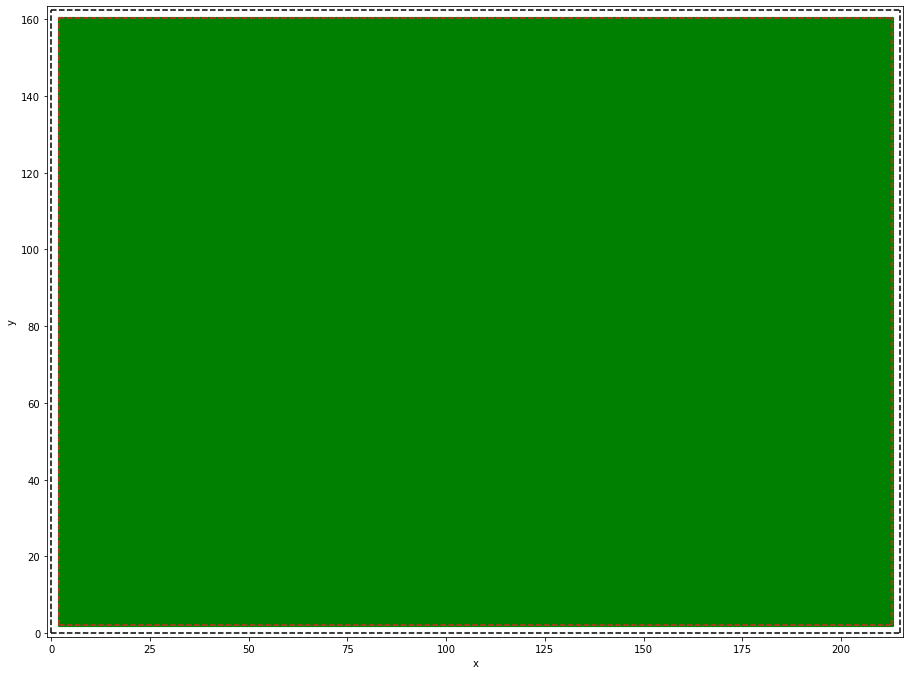

In [12]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df_trim.x, df_trim.y, s=5, c="g")

# Old Border
plt.plot([X_Min, X_Max],[Y_Max, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Min, X_Max],[Y_Min, Y_Min],'--', color='black', alpha=1)
plt.plot([X_Min, X_Min],[Y_Min, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Max, X_Max],[Y_Min, Y_Max],'--', color='black', alpha=1)

# New Border
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Max-(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Min+(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Min+(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Max-(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-1,X_Max+1)
plt.ylim(-1,Y_Max+1)

plt.show()

In [13]:
X_Max_trim = df_trim["x"].max()
X_Min_trim = df_trim["x"].min()
X_step_trim = X_step
X_Dim_trim = (X_Max_trim - X_Min_trim) / X_step

Y_Max_trim = df_trim["y"].max()
Y_Min_trim = df_trim["y"].min()
Y_step_trim = Y_step
Y_Dim_trim = (Y_Max_trim - Y_Min_trim) / Y_step


print("X_Max_trim:\t" + str(X_Max_trim))
print("X_Min_trim:\t" + str(X_Min_trim))
print("X_step_trim:\t" + str(X_step_trim))
print("X_Dim_trim:\t" + str(X_Dim_trim))
print("\n")
print("Y_Max_trim:\t" + str(Y_Max_trim))
print("Y_Min_trim:\t" + str(Y_Min_trim))
print("Y_step_trim:\t" + str(Y_step_trim))
print("Y_Dim_trim:\t" + str(Y_Dim_trim))
print("\n")
print("The dataframe has " + str(df_trim.shape[0]) + " data points")
print("We are expecting " + str(int((X_Dim_trim+1))) + " x " + str(int((Y_Dim_trim+1))) +
      " or " + str(int((X_Dim_trim+1)*(Y_Dim_trim+1))) + " data points")


if df_trim.shape[0] == (X_Dim_trim+1)*(Y_Dim_trim+1):
    print("We're gucci")
else:
    print("We're sad :\'(")


X_Max_trim:	212.8
X_Min_trim:	2.0
X_step_trim:	0.4
X_Dim_trim:	527.0


Y_Max_trim:	160.4
Y_Min_trim:	2.0
Y_step_trim:	0.4
Y_Dim_trim:	396.0


The dataframe has 209616 data points
We are expecting 528 x 397 or 209616 data points
We're gucci


## Error 3: Noise in Euler angle data

In [14]:
EAavg = df_trim.groupby("grain", as_index=False)["phi1","Phi","phi2"].mean()
display(EAavg)

/var/folders/z_/zb7xrpz97lj_rnystyvxpfqh0000gn/T/ipykernel_74649/1523259869.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EAavg = df_trim.groupby("grain", as_index=False)["phi1","Phi","phi2"].mean()


,grain,phi1,Phi,phi2
0,3,3.941112,1.132613,3.300091
1,4,0.845208,2.064571,2.934369
2,5,4.276501,1.674358,1.361055
3,6,0.988851,1.174355,1.579099
4,7,4.493910,0.362944,4.113401
5,8,3.783911,1.514476,0.828429
6,9,5.381876,1.410460,3.718312
7,10,3.800840,1.538737,3.948593
8,12,4.792954,0.959712,3.953692
9,13,4.076378,1.405002,1.687018


In [36]:
df_trim_avg = df_trim.copy()

for index, row in df_trim_avg.iterrows():
    df_trim_avg.at[index, "phi1"] = EAavg.at[EAavg.index[EAavg["grain"]==row["grain"]].tolist()[0], 'phi1'].round(6)
    df_trim_avg.at[index, "Phi"] = EAavg.at[EAavg.index[EAavg["grain"]==row["grain"]].tolist()[0], 'Phi'].round(6)
    df_trim_avg.at[index, "phi2"] = EAavg.at[EAavg.index[EAavg["grain"]==row["grain"]].tolist()[0], 'phi2'].round(6)
    df_trim_avg.at[index, "grain"] = EAavg.index[EAavg["grain"]==row["grain"]].tolist()[0]+1

    
display(df_trim_avg)

,phi1,Phi,phi2,x,y,z,grain,phase,symm
0,3.218233,1.582582,2.861727,2.0,2.0,0.0,35,3,45
1,3.218233,1.582582,2.861727,2.0,2.4,0.0,35,3,45
2,3.218233,1.582582,2.861727,2.0,2.8,0.0,35,3,45
3,3.218233,1.582582,2.861727,2.0,3.2,0.0,35,3,45
4,3.218233,1.582582,2.861727,2.0,3.6,0.0,35,3,45
...,...,...,...,...,...,...,...,...,...
209611,3.909081,1.559796,3.161829,212.8,158.8,0.0,49,3,45
209612,3.909081,1.559796,3.161829,212.8,159.2,0.0,49,3,45
209613,3.909081,1.559796,3.161829,212.8,159.6,0.0,49,3,45
209614,3.909081,1.559796,3.161829,212.8,160.0,0.0,49,3,45


## Error 4: Misaligned data points

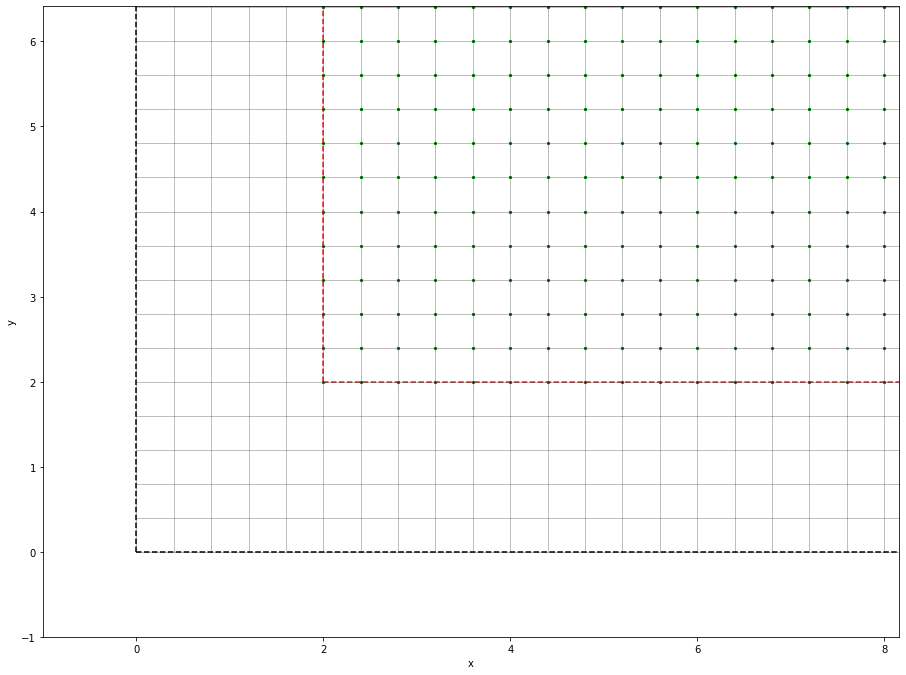

In [22]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df_trim_avg.x, df_trim_avg.y, s=5, c="g")

# Old Border
plt.plot([X_Min, X_Max],[Y_Max, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Min, X_Max],[Y_Min, Y_Min],'--', color='black', alpha=1)
plt.plot([X_Min, X_Min],[Y_Min, Y_Max],'--', color='black', alpha=1)
plt.plot([X_Max, X_Max],[Y_Min, Y_Max],'--', color='black', alpha=1)

# New Border
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Max-(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Min+(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Min+(X_step*dN), X_Min+(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)
plt.plot([X_Max-(X_step*dN), X_Max-(X_step*dN)],[Y_Min+(Y_step*dN), Y_Max-(Y_step*dN)],'--', color='tab:red', alpha=1)

for i in range(30):
    plt.plot([X_Min, X_Max],[Y_Min+(i*Y_step_trim), Y_Min+(i*Y_step_trim)],'-', linewidth=0.5, color='black', alpha=0.5)
    plt.plot([X_Min+(i*X_step_trim), X_Min+(i*X_step_trim)],[Y_Min, Y_Max],'-', linewidth=0.5, color='black', alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-1,(X_Max/30)+1)
plt.ylim(-1,(Y_Max/30)+1)

plt.show()

In [24]:
df_trim_avg_shift = df_trim_avg.copy()

df_trim_avg_shift["x"] -= (4.5*X_step_trim)
df_trim_avg_shift["y"] -= (4.5*Y_step_trim)

display(df_trim_avg_shift)

,phi1,Phi,phi2,x,y,z,grain,phase,symm
0,3.218233,1.582582,2.861727,0.2,0.2,0.0,45,3,45
1,3.218233,1.582582,2.861727,0.2,0.6,0.0,45,3,45
2,3.218233,1.582582,2.861727,0.2,1.0,0.0,45,3,45
3,3.218233,1.582582,2.861727,0.2,1.4,0.0,45,3,45
4,3.218233,1.582582,2.861727,0.2,1.8,0.0,45,3,45
...,...,...,...,...,...,...,...,...,...
209611,3.909081,1.559796,3.161829,211.0,157.0,0.0,59,3,45
209612,3.909081,1.559796,3.161829,211.0,157.4,0.0,59,3,45
209613,3.909081,1.559796,3.161829,211.0,157.8,0.0,59,3,45
209614,3.909081,1.559796,3.161829,211.0,158.2,0.0,59,3,45


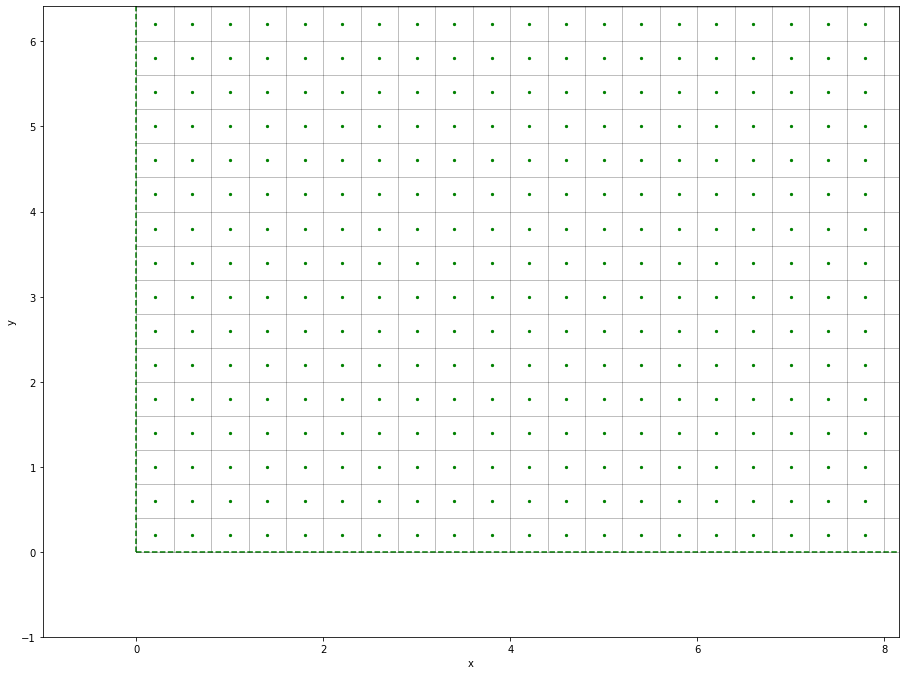

In [27]:
Plot_Scalling_Factor = 35
plt.rcParams["figure.figsize"] = (X_Dim/Plot_Scalling_Factor, Y_Dim/Plot_Scalling_Factor)

plt.scatter(df_trim_avg_shift.x, df_trim_avg_shift.y, s=5, c="g")

# Old Border
plt.plot([X_Min, X_Max],[Y_Max, Y_Max],'--', color='green', alpha=1)
plt.plot([X_Min, X_Max],[Y_Min, Y_Min],'--', color='green', alpha=1)
plt.plot([X_Min, X_Min],[Y_Min, Y_Max],'--', color='green', alpha=1)
plt.plot([X_Max, X_Max],[Y_Min, Y_Max],'--', color='green', alpha=1)

for i in range(30):
    plt.plot([X_Min, X_Max],[Y_Min+(i*Y_step_trim), Y_Min+(i*Y_step_trim)],'-', linewidth=0.5, color='black', alpha=0.5)
    plt.plot([X_Min+(i*X_step_trim), X_Min+(i*X_step_trim)],[Y_Min, Y_Max],'-', linewidth=0.5, color='black', alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(-1,(X_Max/30)+1)
plt.ylim(-1,(Y_Max/30)+1)

plt.show()

# Writing to New Input File

In [61]:
NumGrains = df_trim_avg_shift.groupby("phase", as_index=False)["grain", "symm"].nunique()

BCCGrains = NumGrains.at[NumGrains.index[NumGrains["phase"]==2].tolist()[0], "grain"]
FCCGrains = NumGrains.at[NumGrains.index[NumGrains["phase"]==3].tolist()[0], "grain"]

display(NumGrains)

/var/folders/z_/zb7xrpz97lj_rnystyvxpfqh0000gn/T/ipykernel_74649/496953385.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NumGrains = df_trim_avg_shift.groupby("phase", as_index=False)["grain", "symm"].nunique()


,phase,grain,symm
0,2,25,1
1,3,24,1


In [ ]:
# Header:     Marmot Input File
#
# Column 1:  Euler angle "phi1" (in radians)
# Column 2:  Euler angle "PHI" (in radians)
# Column 3:  Euler angle "phi2" (in radians)
# Column 4:  x-coordinate (in microns)
# Column 5:  y-coordinate (in microns)
# Column 6:  z-coordinate (in microns)
# Column 7:  grain number (integer)
# Column 8:  phase number (integer)
# Column 9:  symmetry class (from TSL)
#
# Phase 1: notIndexed (symmetry class = 0)
# Number of grains in Phase 1: 0
#
# Phase 2: Iron bcc (old) (symmetry class = 45)
# Number of grains in Phase 2: 35
#
# Phase 3: Iron fcc (symmetry class = 45)
# Number of grains in Phase 3: 24
#
# X_Min:      0.000000
# X_Max:    214.800000
# X_step:     0.400000
# X_Dim:    5.370000e+02
#
# Y_Min:      0.000000
# Y_Max:    162.399990
# Y_step:     0.399995
# Y_Dim:    4.060051e+02
#
# Z_Min:      0.000000
# Z_Max:      0.000000
# Z_step:     0.000000
# Z_Dim:      0
#
# Note:  This is a 2D dataset with z-coordinates set to zero!
#

In [66]:
with open('./inputs/Editted_Input_Data.txt', 'w') as f:   
    f.write("""# Header:\tMarmot Input File
#
# Column 1:\tEuler angle "phi1" (in radians)
# Column 2:\tEuler angle "PHI" (in radians)
# Column 3:\tEuler angle "phi2" (in radians)
# Column 4:\tx-coordinate (in microns)
# Column 5:\ty-coordinate (in microns)
# Column 6:\tz-coordinate (in microns)
# Column 7:\tgrain number (integer)
# Column 8:\tphase number (integer)
# Column 9:\tsymmetry class (from TSL)
""")
    
with open('./inputs/Editted_Input_Data.txt', 'a') as f:   
    f.write("""#
# Phase 1: notIndexed (symmetry class = 0)
# Number of grains in Phase 1: 0
#
# Phase 2: Iron bcc (old) (symmetry class = 45)
# Number of grains in Phase 2: {}
#
# Phase 3: Iron fcc (symmetry class = 45)
# Number of grains in Phase 3: {}
""".format(BCCGrains, FCCGrains))
    
with open('./inputs/Editted_Input_Data.txt', 'a') as f:   
    f.write("""#
# X_Min:\t{}
# X_Max:\t{}
# X_step:\t{}
# X_Dim:\t{}
""".format(X_Min_trim, X_Max_trim, X_step_trim, X_Dim_trim))
    
with open('./inputs/Editted_Input_Data.txt', 'a') as f:   
    f.write("""#
# X_Min:\t{}
# X_Max:\t{}
# X_step:\t{}
# X_Dim:\t{}
""".format(Y_Min_trim, Y_Max_trim, Y_step_trim, Y_Dim_trim))
    
with open('./inputs/Editted_Input_Data.txt', 'a') as f:   
    f.write("""#
# Z_Min:\t0.0
# Z_Max:\t0.0
# Z_step:\t0.0
# Z_Dim:\t0.0
#
# Note:  This is a 2D dataset with z-coordinates set to zero!
#
""")
    
with open('./inputs/Editted_Input_Data.txt', 'a') as f:
    dfAsString = df_trim_avg_shift.to_string(header=False, index=False)
    f.write(dfAsString)
    
    